# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [11]:
import nltk
nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
np.seterr(invalid='ignore')
import pandas as pd
import sklearn
import random
from sklearn.metrics import silhouette_score
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer


     |████████████████████████████████| 79 kB 7.3 MB/s 
     |████████████████████████████████| 3.5 MB 45.1 MB/s 
     |████████████████████████████████| 1.2 MB 42.1 MB/s 
     |████████████████████████████████| 67 kB 6.3 MB/s 
     |████████████████████████████████| 6.8 MB 56.1 MB/s 
     |████████████████████████████████| 596 kB 66.9 MB/s 
     |████████████████████████████████| 895 kB 54.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=b17a70cc29c41a62a75b1cea3a5aa31216c14d723263cb7df50e5a87655e58ee
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [14]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
# newsgroups_test = fetch_20newsgroups(subset='test')

# print(list(newsgroups_train))
# ['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset
# print(list(newsgroups_train.target_names))
# print(len(list(newsgroups_train.data)))
# print(len(list(newsgroups_test.data)))
type(newsgroups_train)

sklearn.utils.Bunch

In [15]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [16]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_tag(sentence)
  sentence = remove_punct(remove_urls(sentence))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [17]:

def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)

  return review_embedding




In [7]:
def get_processed_data(newsgroups_train):
  df = pd.DataFrame(list(newsgroups_train.data), columns=['news'])
  df['target'] = list(newsgroups_train.target)
  df['news'] = df['news'].apply(get_review_embedding)
  X = np.array(df['news'].values.tolist())
  y = np.array(df['target'])
  return X,y


In [ ]:
X,y = get_processed_data(newsgroups_train=newsgroups_train)


In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# import pickle

In [9]:
# with open('/content/drive/My Drive/SMAI/A2/pickled_datafile.pkl', 'rb') as fid:
#   X=pickle.load(fid)

In [18]:
print(X.shape)
# y = np.array(newsgroups_train.target)
print(y.shape)

(11314, 768)
(11314,)


Cumulative variance by 100 principal components: 98.40%


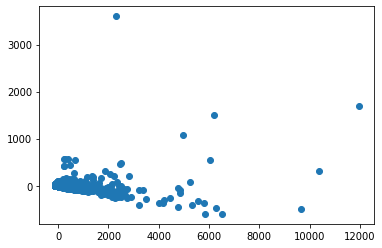

In [24]:
# data visualization 

# Try to visualise the points from all the domains and try to visualise them 
# hint: you can use PCA 

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
Xt = pca.fit_transform(X)
print('Cumulative variance by 100 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))
plot = plt.scatter(Xt[:,0], Xt[:,1])
plt.show()


# K_Means Algorithm


In [25]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=4,init="k-means++").fit(X)
kmeans.labels_

array([16,  0,  9, ..., 16, 16,  0], dtype=int32)

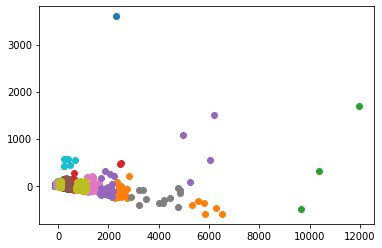

In [26]:
#code for visualisation of clusters
unique_labels = np.unique(kmeans.labels_)
for i in unique_labels:
    plt.scatter(Xt[kmeans.labels_ == i , 0] , Xt[kmeans.labels_== i , 1] , label = i)
plt.show()

# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







In [22]:
def elbow_method(X,k):
  wss = list()
  for i in k:
    kmeans = KMeans(n_clusters=i, random_state=4,init="k-means++")
    kmeans = kmeans.fit(X)
    wss_inertia = kmeans.inertia_
    wss.append(wss_inertia)
  return wss

def elbow_plot(K,wss):
  plt.figure(figsize=(10,5))
  plt.plot(K, wss, marker='o', linewidth=1.0)
  plt.xticks(np.arange(2,21,1))
  plt.xlabel('Values of K')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method using Inertia')
  plt.show()

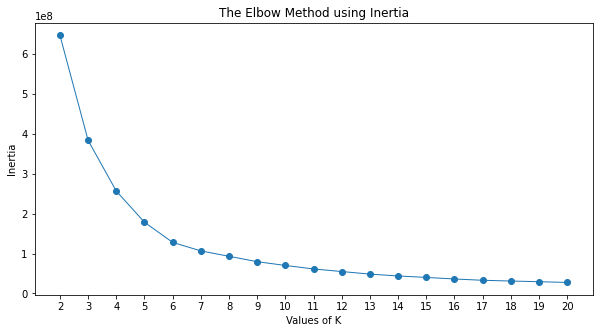

In [23]:
K=[i for i in range(1,21)]
wss = elbow_method(X,K)
elbow_plot(K,wss)

#####For determining the optimal number of clusters using elbow method we select the value of 'K' where the 'elbow' is formed i.e. the point in the graph after which the inertia/ distortion start decreasing in linear fashion. By seeing the graph, we can conclude that the optimal value of 'K' i.e. number of clusters is 5.

# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




In [20]:
def my_silhouette_score(X,K):
  ss_score = list()
  for i in K:
    kmeans = KMeans(n_clusters=i, random_state=4,init="k-means++")
    kmeans = kmeans.fit(X)
    s_score = silhouette_score(X, kmeans.labels_, metric='euclidean')
    ss_score.append(s_score)
  return ss_score

def silhouette_plot(K,ss_score):
  plt.figure(figsize=(10,5))
  plt.plot(K, ss_score, marker='o', linewidth=1.0)
  plt.xticks(np.arange(2,21,1))
  plt.xlabel('Values of K')
  plt.ylabel('Silhouette Score')
  plt.title('The Silhouette Method')
  plt.show()
  

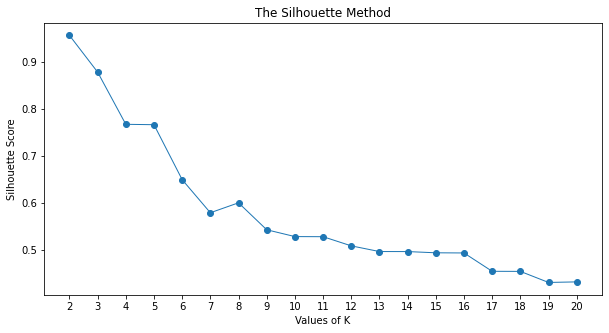

In [27]:
K=[i for i in range(2,21)]
ss_score = my_silhouette_score(X,K)
max_ss_score = max(ss_score)
max_idx = ss_score.index(max_ss_score)
silhouette_plot(K,ss_score)

silhoutte - The no of clusters here are calculated by the finding the max value of silhoutte score, thus comes out as 2.

# Agglomerative clustering

In [28]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import AgglomerativeClustering

def my_AgglomerativeClustering(X,K):
  clustering = AgglomerativeClustering(n_clusters=K).fit(X)
  return clustering


In [29]:
#code for visualisation of clusters
def AgglomerativeClustering_plot(X,cluster_labels):
  plt.figure(figsize=(10, 7))  
  plt.scatter(X[:,0], X[:,1], c=cluster_labels) 
  plt.show()


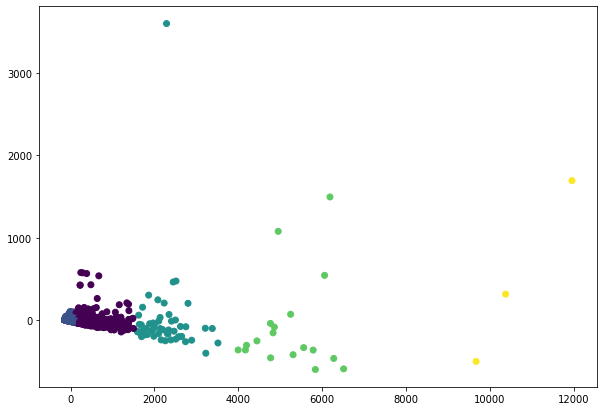

In [30]:
model = my_AgglomerativeClustering(Xt,5)
AgglomerativeClustering_plot(Xt,model.labels_)

# Dendogram


*   Try to understand the difference between agglomerative clustering and hierarchical clustering
*   Plot dendograms for both kinds of clustering
*   Find the optimal number of clusters with the help of Dendogram



Difference between Agglomerative and Divisive Clustering:
* Agglomerative clustering is simpler than Divisive CLustering as in Divisive clustering we need flat clustering method as a "subroutine" to split cluster untill each data has its own cluster.
* Divisive clustering is more efficient than Agglomerative clustering. Time complexity for naive Agglomerative Clustering is O(n^3). Using priority queue we can reduce its time complexity to O(n^2 logn). Whereas for divisive clustering given a fixed number of top levels, and using efficient flat K-means, divisive algorithms are linear in number of clusters and patterns.
* Agglomerative clustering is less accurate than Divisive algorithm. In agglomerative clustering we make decisions by considering local patterns or points which are neighbor without taking into account global distribution. Whereas in divisive clustering global distribution of data is taken into account when making decison for top-level partitioning.




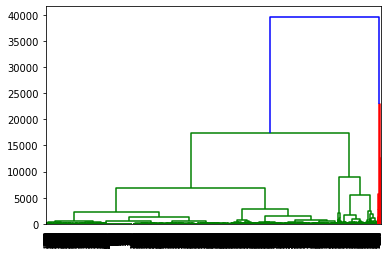

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(25,10))
z = linkage(X,'ward')
d = dendrogram(z)    

In [34]:
clusters = np.unique(d['color_list'])
num_clusters = clusters.shape[0] - 1
print("Optimal K using Dendrogram: ", num_clusters)

Optimal K using Dendrogram:  2


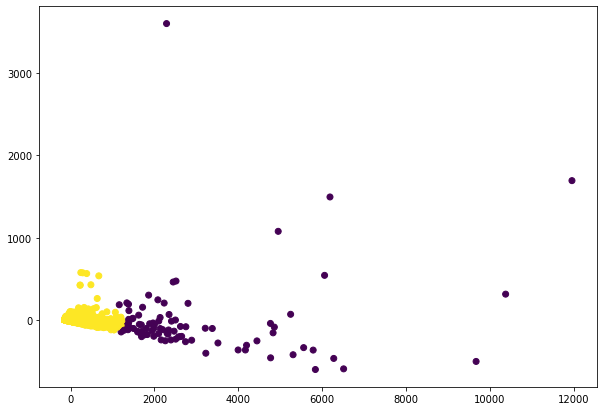

In [33]:
model = my_AgglomerativeClustering(X,num_clusters)
AgglomerativeClustering_plot(Xt,model.labels_)

# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


